# *Importing Libraries*

In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# *Dataset*

In [3]:
data=pd.read_csv("Assignment_Dataset.csv")
data.Date = pd.to_datetime(data.Date)

# *Average PR Calculation*

In [4]:
seven=round(data.PR.tail(7).mean(),1)
thirty=round(data.PR.tail(30).mean(),1)
sixty=round(data.PR.tail(60).mean(),1)
ninety=round(data.PR.tail(90).mean(),1)
tsf=round(data.PR.tail(365).mean(),1)
life=round(data.PR.mean(),1)

# *Separating data based on GHI*

In [5]:
lessthantwo=[]
bettwofour=[]
betfoursix=[]
greaterthansix=[]
for index, i in data['GHI'].iteritems():
    if i < 2:
        lessthantwo.append(data.iloc[index])
    elif i >= 2 and i <4:
        bettwofour.append(data.iloc[index])
    elif i >= 4 and i <6:
        betfoursix.append(data.iloc[index])
    elif i>6:
        greaterthansix.append(data.iloc[index])
dlessthantwo=pd.DataFrame(lessthantwo)
dbettwofour=pd.DataFrame(bettwofour)
dbetfoursix=pd.DataFrame(betfoursix)
dgreaterthansix=pd.DataFrame(greaterthansix)

# *Calculating Target Budget Yield PR*

In [6]:
y = [73.9 * (1 - 0.008) ** i for i in range(4)]
dates = []
dates.append(dt.datetime(2019, 7,  1))
dates.append(dt.datetime(2020, 6, 30))
dates.append(dt.datetime(2021, 6, 30))
dates.append(dt.datetime(2022, 3, 24))

# *Counting points above Target  Budget PR*

In [7]:
count=0
for index, i in data['PR'].iteritems():
    if data.iloc[index].Date>= dt.datetime(2019, 7,  1) and data.iloc[index].Date< dt.datetime(2020, 6,  30) and i> y[0]:
        count+=1
    elif data.iloc[index].Date>= dt.datetime(2020, 6, 30) and data.iloc[index].Date< dt.datetime(2021, 6, 30) and i> y[1]:
        count+=1
    elif data.iloc[index].Date>= dt.datetime(2021, 6, 30) and data.iloc[index].Date< dt.datetime(2022, 3, 24) and i> y[2]:
        count+=1
points=round((count/data.shape[0])*100,1)

# *Plotting the graph*

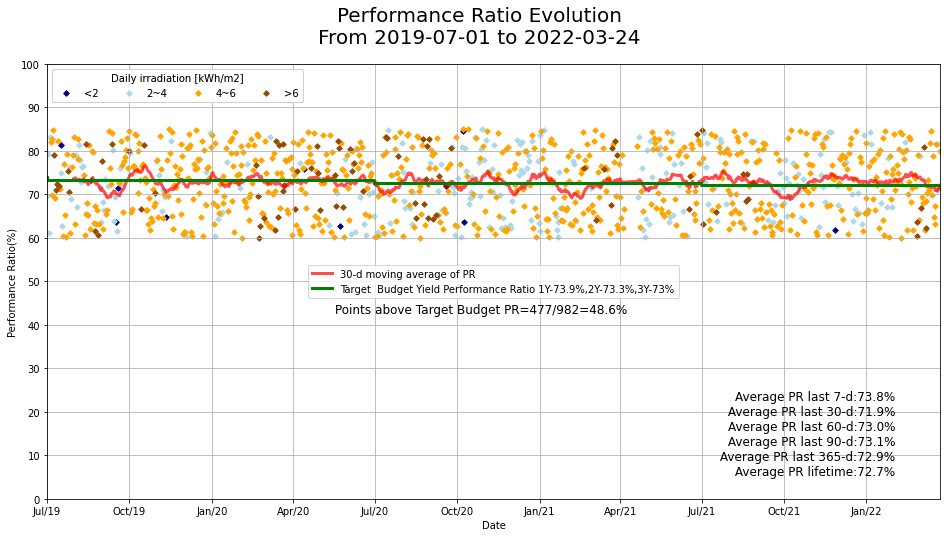

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.ylim(0,100)
plt.yticks(np.arange(0, 110, step=10)) 
plt.grid()
fig.suptitle("Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24", fontsize=20)

#Scatter plot of PR value of the day shaded with GHI based on GHI value
plt.scatter('Date', 'PR', data=dlessthantwo,    label="<2", marker='D', s=15, color='#000080')
plt.scatter('Date', 'PR', data=dbettwofour,     label="2~4",marker='D', s=15, color="#ADD8E6")
plt.scatter('Date', 'PR', data=dbetfoursix,     label="4~6",marker='D', s=15, color="#FFA500")
plt.scatter('Date', 'PR', data=dgreaterthansix, label=">6", marker='D', s=15, color="#964B00")

#Graph representing the 30-d moving average of PR
plt.plot(data['Date'], data['PR'].rolling(30).mean(),label='30-d moving average of PR',c='red',linewidth=3, alpha=0.7)

#Graph representing the Target  Budget Yield Performance Ratio
plt.step(dates, y, label="Target  Budget Yield Performance Ratio 1Y-{}%,2Y-{}%,3Y-{}%".format(round(y[0],1),round(y[1],1),round(y[2]),1), color="green", linewidth=3)
date_fmt = mdates.DateFormatter('%b/%y')
ax.xaxis.set_major_formatter(date_fmt)
ax.set_xlim([dt.datetime(2019, 7, 1), dt.datetime(2022, 3, 24)])


lines = plt.gca().get_lines()
include = [0,1]
legend1 = plt.legend([lines[i] for i in include],[lines[i].get_label() for i in include], loc="center")
legend2 = plt.legend(["<2", "2~4", "4~6", ">6"],ncol = 4 , loc = "upper left",title="Daily irradiation [kWh/m2]")
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.text(0.95,0.25, 'Average PR last 7-d:{}%\n Average PR last 30-d:{}%\nAverage PR last 60-d:{}%\n Average PR last 90-d:{}%\n Average PR last 365-d:{}%\n Average PR lifetime:{}%'.format(seven,thirty,sixty,ninety,tsf,life),
     horizontalalignment='right',
     verticalalignment='top',
         fontsize=12,
     transform = ax.transAxes)
plt.text(0.65,0.45,'Points above Target Budget PR={}/{}={}%'.format(count,data.shape[0],points),horizontalalignment='right',
     verticalalignment='top',
         fontsize=12,
     transform = ax.transAxes)

plt.ylabel("Performance Ratio(%)")
plt.xlabel("Date")
plt.show()